# **India Macro Outlook: Growth Normalization and Cycle Positioning**


---
## 1. Executive Summary

India’s economy has transitioned from a pandemic-driven rebound to a phase of steady-state expansion. Real GDP growth has stabilized around 6–7% YoY, with quarterly dynamics indicating normalization close to potential output. HP-filter estimates suggest the output gap has turned mildly positive, implying that the economy is operating near full capacity.

While structural headwinds—such as weak private investment and productivity constraints—cap potential growth, resilient domestic demand and a credible policy framework continue to support medium-term stability. For investors, this environment favors selective risk-taking in equities and local-currency debt, with limited room for policy easing.

In [ ]:
# Core imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.tsa.filters.hp_filter import hpfilter

# Display settings
plt.style.use("seaborn-v0_8")
pd.options.display.float_format = "{:,.2f}".format



In [ ]:
import pandas as pd

# Read the CSV into pandas
df = pd.read_csv('/content/RGDP_IND_Q_NSA.csv')

#Rename Columns
df= df.rename(columns={
    'observation_date': 'Date',
    'NGDPRNSAXDCINQ': 'Real_GDP'
})

# Check data types
print(df.dtypes)

#Converting to Date Time Object
df['Date'] = pd.to_datetime(df['Date'])

#Setting Date as Index
df = df.set_index('Date').sort_index()

#Checking for missing values
df.isnull().values.any()



Date         object
Real_GDP    float64
dtype: object


np.False_

<Axes: title={'center': 'Real GDP (Quarterly, INR, Constant Prices)'}, xlabel='Date'>

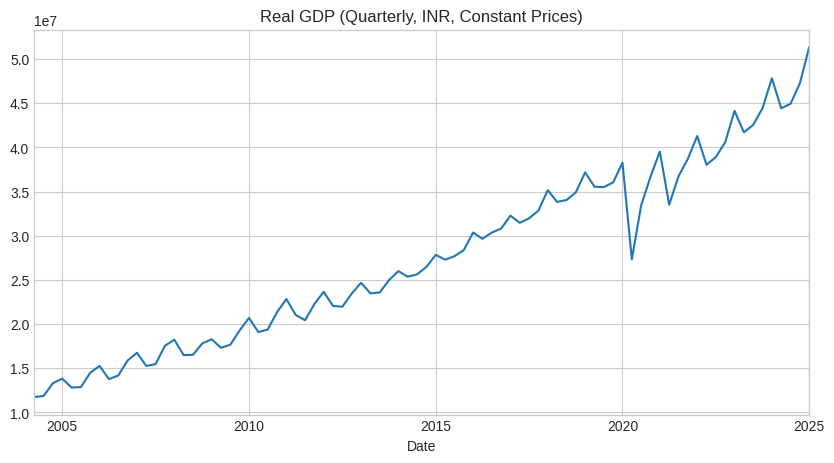

In [ ]:
# Checking for Outliers

df['Real_GDP'].plot(figsize=(10,5), title='Real GDP (Quarterly, INR, Constant Prices)')


A visual inspection of the Real GDP estimates show clear signs of a trend as well as inconsistency around COVID. There also appears to be seasonlity in the GDP indicated by the peaks at the beginning of the year.

In [ ]:
import numpy as np
#Estimating Z Scores
z_scores = np.abs((df['Real_GDP'] - df['Real_GDP'].mean()) / df['Real_GDP'].std())
outliers = df[z_scores > 2]

#Locating Outliers
df.loc[z_scores > 3, ['Real_GDP']].assign(Z_Score=z_scores[z_scores > 3])
print((z_scores > 2).sum())

#Alternate Method

df['QoQ'] = df['Real_GDP'].pct_change() * 100
z_scores_growth = np.abs((df['QoQ'] - df['QoQ'].mean()) / df['QoQ'].std())
outliers_growth = df[z_scores_growth > 3]
display(outliers_growth[['Real_GDP', 'QoQ']])


1


,Real_GDP,QoQ
Date,,
2020-04-01,27323061.6,-28.598494


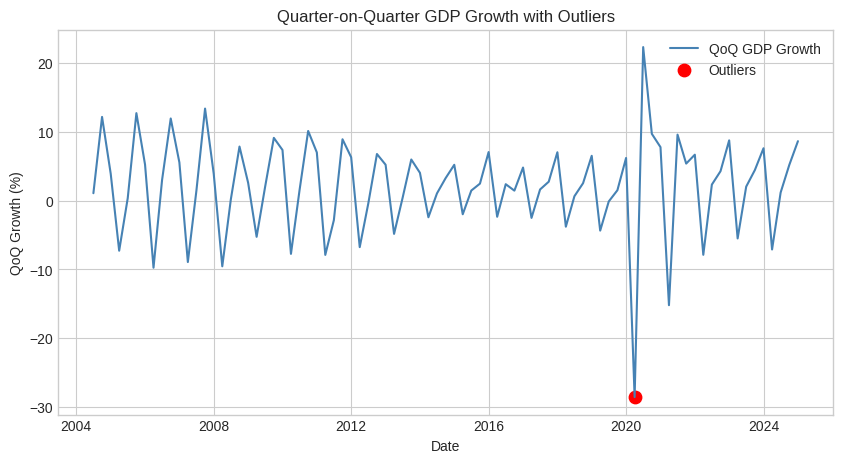

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df.index, df['QoQ'], label='QoQ GDP Growth', color='steelblue')
plt.scatter(outliers_growth.index, outliers_growth['QoQ'], color='red', s=80, label='Outliers')
plt.title('Quarter-on-Quarter GDP Growth with Outliers')
plt.xlabel('Date')
plt.ylabel('QoQ Growth (%)')
plt.legend()
plt.show()

Initial inspection of the Real GDP estimates alone did not yield any indication of an outlier based on the Z Scores calculated. Even reducdtion of threshold from 3 to 2.5 and 2 did not capture any outliers.

As a second layer of detection, the Z scores of the quarterly growth rates were estimated. At 3 standard deviations, one outlier was found which was an indication of the COVID impact.

Since HP Filter is sensitive to outliers, the GDP is smoothed using a three quarter centered moving average.

### Computing Growth Rates

In [ ]:
# Estimating Real GDP Growth Rates
df['GDP_Growth_QoQ'] = df['Real_GDP'].pct_change() * 100

#Estimating Quaterly Annualized Growth Rates
df['GDP_Growth_QoQ_Annualized'] = ((1 + df['GDP_Growth_QoQ']/100)**4 - 1) * 100

#Estimating Year over Year Growth Rate
df['GDP_Growth_YoY'] = df['Real_GDP'].pct_change(4) * 100

### Year over Year Growth Rates

In [ ]:
# Drop NaNs for clean plotting
df = df.dropna(subset=['GDP_Growth_QoQ', 'GDP_Growth_YoY', 'GDP_Growth_QoQ_Annualized'])

import plotly.express as px

fig = px.line(
    df,
    x=df.index,
    y='GDP_Growth_YoY',
    title='Year-over-Year Real GDP Growth (Interactive)',
    labels={'GDP_Growth_YoY': 'YoY Growth (%)', 'x': 'Date'}
)
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(
    template='plotly_white',
    yaxis_title='YoY Growth (%)',
    xaxis_title='Date',
)
fig.show()



### Quarter over Quarter Growth Rates

In [ ]:
import plotly.express as px
import matplotlib as mpl

# --- IMF color palette ---
imf_blue = "#003366"
imf_light_blue = "#6BAED6"
imf_orange = "#E6550D"
imf_gray = "#7F7F7F"

# QoQ
fig1 = px.line(df, x=df.index, y='GDP_Growth_QoQ',
               title='Quarter-over-Quarter Real GDP Growth',
               color_discrete_sequence=[imf_blue])
fig1.update_xaxes(rangeslider_visible=True)
fig1.update_layout(template='plotly_white', yaxis_title='QoQ Growth (%)', xaxis_title='Date')
fig1.show()

# Annualized
fig2 = px.line(df, x=df.index, y='GDP_Growth_QoQ_Annualized',
               title='Quarterly Annualized Real GDP Growth',
               color_discrete_sequence=[imf_orange])
fig2.update_xaxes(rangeslider_visible=True)
fig2.update_layout(template='plotly_white', yaxis_title='Annualized Growth (%)', xaxis_title='Date')
fig2.show()


## ESTIMATION OF POTENTIAL OUTPUT & OUTPUT GAPS
---

HP Filter (Lambda =1600) for quarterly data

In [ ]:
#df = df.drop(['HP_Cycle', 'HP_Trend', 'Potential_GDP_Level',
              #'Output_Gap_Level_%', 'Potential_GDP_Growth_QoQ'], axis=1)

In [ ]:
import pandas as pd
from statsmodels.tsa.filters.hp_filter import hpfilter

# Suppose `real_gdp` is in billions of rupees
cycle, trend = hpfilter(df['Real_GDP'], lamb=1600)  # quarterly data
df['Trend'] = trend
df['Cycle'] = cycle



,Real_GDP,is_anomaly,Real_GDP_Adjusted,GDP_Growth_QoQ,GDP_Growth_QoQ_Annualized,GDP_Growth_YoY,log_Real_GDP,Trend,Cycle
Date,,,,,,,,,
2005-04-01,12815882.5,0,12815882.5,-7.295594,-26.141327,9.223864,16.366196,1.321105e+07,-3.951638e+05
2005-07-01,12860723.6,0,12860723.6,0.349887,1.406910,8.443715,16.369689,1.354039e+07,-6.796642e+05
2005-10-01,14497136.7,0,14497136.7,12.724114,61.460881,8.973431,16.489462,1.386948e+07,6.276544e+05
2006-01-01,15256403.0,0,15256403.0,5.237354,22.653423,10.358048,16.540510,1.419766e+07,1.058745e+06
2006-04-01,13765041.2,0,13765041.2,-9.775317,-33.732368,7.406113,16.437643,1.452464e+07,-7.595943e+05
2006-07-01,14177520.7,0,14177520.7,2.996573,12.535902,10.238904,16.467168,1.485080e+07,-6.732764e+05
2006-10-01,15871097.2,0,15871097.2,11.945505,57.045915,9.477461,16.580010,1.517605e+07,6.950471e+05
2007-01-01,16751504.8,0,16751504.8,5.547238,24.104491,9.799832,16.633999,1.549988e+07,1.251624e+06
2007-04-01,15252990.5,0,15252990.5,-8.945550,-31.260765,10.809625,16.540286,1.582221e+07,-5.692212e+05


## Comparing Actual vs Potential GDP

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Compute output gap (%)
df["Output_Gap_%"] = (df["Cycle"] / df["Trend"]) * 100

# Create 2 interactive subplots
fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.1,
    subplot_titles=(
        "Actual vs Potential GDP (HP Filter)",
        "Output Gap (% of Potential GDP)"
    )
)

# --- Plot 1: Actual vs Potential GDP ---
fig.add_trace(
    go.Scatter(
        x=df.index, y=df["Real_GDP"]/1e7,
        mode="lines",
        name="Actual GDP (INR Crore)",
        line=dict(color="blue", width=2)
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=df.index, y=df["Trend"]/1e7,
        mode="lines",
        name="Potential GDP (Trend, INR Crore)",
        line=dict(color="red", width=2, dash="dash")
    ),
    row=1, col=1
)

# --- Plot 2: Output Gap (% of Potential GDP) ---
fig.add_trace(
    go.Scatter(
        x=df.index, y=df["Output_Gap_%"],
        mode="lines",
        name="Output Gap (%)",
        line=dict(color="green", width=2)
    ),
    row=2, col=1
)

# Add zero reference line
fig.add_hline(y=0, line_dash="dash", line_color="black", row=2, col=1)

# Layout styling
fig.update_layout(
    title_text="India: Real vs Potential GDP and Output Gap",
    height=800,
    template="plotly_white",
    hovermode="x unified",
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)

fig.update_yaxes(title_text="GDP (INR Crore)", row=1, col=1)
fig.update_yaxes(title_text="% of Potential GDP", row=2, col=1)
fig.update_xaxes(title_text="Date", row=2, col=1)

fig.show()



## Comparing Potential and Actual Growth Rates in Output

In [ ]:
import plotly.graph_objects as go

# Compute growth rates (quarter-over-quarter, %)
df["Potential_Growth_%"] = df["Trend"].pct_change() * 100

# Interactive plot
fig = go.Figure()

# Actual GDP Growth
fig.add_trace(
    go.Scatter(
        x=df.index,
        y=df["GDP_Growth_QoQ"],
        mode="lines",
        name="Actual GDP Growth (%)",
        line=dict(color="blue", width=2),
        hovertemplate="%{y:.2f}%<extra></extra>"
    )
)

# Potential GDP Growth
fig.add_trace(
    go.Scatter(
        x=df.index,
        y=df["Potential_Growth_%"],
        mode="lines",
        name="Potential GDP Growth (%)",
        line=dict(color="red", width=2, dash="dash"),
        hovertemplate="%{y:.2f}%<extra></extra>"
    )
)

# Layout customization
fig.update_layout(
    title="Actual vs Potential GDP Growth Rates",
    xaxis_title="Date",
    yaxis_title="Growth Rate (%)",
    template="plotly_white",
    hovermode="x unified",
    height=600,
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
)

# Show interactive chart
fig.show()



### Summary Statistics

In [ ]:
summary = df[["GDP_Growth_YoY", "GDP_Growth_QoQ", "Output_Gap_%"]].describe()
summary


,GDP_Growth_YoY,GDP_Growth_QoQ,Output_Gap_%
count,80.000000,80.000000,80.000000
mean,6.891868,1.918390,-0.005818
std,4.795442,7.170921,5.231758
min,-23.134129,-28.598494,-24.027440
25%,5.424105,-2.083933,-3.395914
50%,7.267591,2.498775,-0.095343
75%,9.161282,6.557818,3.441382
max,22.633773,22.338282,9.510855


### Cumulative Annualized Growth Rates

In [ ]:
import numpy as np

# Ensure GDP is numeric and indexed by date
df = df.sort_index()

# Choose time period
start_date = df.index.min()
end_date = df.index.max()

gdp_start = df.loc[start_date, "Real_GDP"]
gdp_end = df.loc[end_date, "Real_GDP"]

# Number of years between start and end (based on quarters)
years = (end_date - start_date).days / 365.25

# Compute CAGR
cagr = (gdp_end / gdp_start) ** (1 / years) - 1
print(f"CAGR from {start_date.date()} to {end_date.date()}: {cagr * 100:.2f}%")


CAGR from 2005-04-01 to 2025-01-01: 7.28%


In [ ]:
# Rolling CAGR over last 4 years (16 quarters)
window = 16

df["Rolling_CAGR_%"] = (
    (df["Real_GDP"] / df["Real_GDP"].shift(window)) ** (1 / (window / 4)) - 1
) * 100


In [ ]:
import plotly.express as px

fig = px.line(
    df,
    x=df.index,
    y="Rolling_CAGR_%",
    title="Rolling 4-Year CAGR of Real GDP (%)",
    labels={"Rolling_CAGR_%": "CAGR (%)"},
)
fig.add_hline(y=cagr*100, line_dash="dash", line_color="red",
              annotation_text=f"Full-period CAGR: {cagr*100:.2f}%",
              annotation_position="bottom right")

fig.update_layout(template="plotly_white", hovermode="x unified", height=500)
fig.show()


# DASHBOARD